## Resources

In [128]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

In [129]:
import functions as fn

# See functions.py to see how the data is cleaned

df = fn.import_and_clean_data('../data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,age
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,52
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,71
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520,65
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020,11
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188,9


## EDA

In [130]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'greenbelt', 'nuisance', 'view',
       'condition', 'grade', 'heat_source', 'sewer_system', 'sqft_above',
       'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built',
       'yr_renovated', 'address', 'lat', 'long', 'age'],
      dtype='object')

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28959 entries, 0 to 30154
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             28959 non-null  int64  
 1   date           28959 non-null  object 
 2   price          28959 non-null  float64
 3   bedrooms       28959 non-null  int64  
 4   bathrooms      28959 non-null  float64
 5   sqft_living    28959 non-null  int64  
 6   sqft_lot       28959 non-null  int64  
 7   floors         28959 non-null  float64
 8   waterfront     28959 non-null  object 
 9   greenbelt      28959 non-null  object 
 10  nuisance       28959 non-null  object 
 11  view           28959 non-null  object 
 12  condition      28959 non-null  int64  
 13  grade          28959 non-null  int64  
 14  heat_source    28959 non-null  object 
 15  sewer_system   28959 non-null  object 
 16  sqft_above     28959 non-null  int64  
 17  sqft_basement  28959 non-null  int64  
 18  sqft_g

In [132]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long,age
count,2.895900e+04,2.895900e+04,28959.000000,28959.000000,28959.000000,28959.000000,28959.000000,28959.000000,28959.000000,28959.000000,28959.000000,28959.000000,28959.000000,28959.000000,28959.000000,28959.000000,28959.000000,28959.000000
mean,4.583861e+09,1.051138e+06,3.389344,2.289910,2037.981629,11570.077972,1.540108,3.473739,7.591630,1754.269346,452.054456,315.158431,198.305466,1974.763528,88.322180,47.321251,-121.290675,46.236472
std,2.882613e+09,7.233138e+05,0.961320,0.828525,841.673375,20406.186603,0.569324,0.702963,1.068168,791.055170,535.663377,261.715858,204.128819,32.200530,410.739076,1.458032,5.823823,32.200530
min,1.000055e+06,2.736000e+04,0.000000,0.000000,260.000000,402.000000,1.000000,1.000000,2.000000,260.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480,-1.000000
25%,2.126049e+09,6.400000e+05,3.000000,2.000000,1400.000000,4766.500000,1.000000,3.000000,7.000000,1170.000000,0.000000,0.000000,40.000000,1952.000000,0.000000,47.404870,-122.327988,18.000000
50%,3.901000e+09,8.500000e+05,3.000000,2.500000,1890.000000,7318.000000,1.500000,3.000000,7.000000,1530.000000,0.000000,380.000000,140.000000,1977.000000,0.000000,47.551060,-122.231760,44.000000
75%,7.308000e+09,1.261000e+06,4.000000,2.500000,2540.000000,10092.500000,2.000000,4.000000,8.000000,2200.000000,920.000000,500.000000,300.000000,2003.000000,0.000000,47.670560,-122.120488,69.000000
max,9.904000e+09,3.075000e+07,11.000000,7.500000,5140.000000,218226.000000,4.000000,5.000000,12.000000,5500.000000,2010.000000,1060.000000,1070.000000,2022.000000,2022.000000,64.824070,-70.074340,121.000000


In [133]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
greenbelt        0
nuisance         0
view             0
condition        0
grade            0
heat_source      0
sewer_system     0
sqft_above       0
sqft_basement    0
sqft_garage      0
sqft_patio       0
yr_built         0
yr_renovated     0
address          0
lat              0
long             0
age              0
dtype: int64

In [134]:
print(df['sqft_living'].sort_values(ascending = False))

9948     5140
12350    5130
11219    5130
23258    5130
20717    5130
         ... 
11989     310
23622     290
8391      290
5811      290
8694      260
Name: sqft_living, Length: 28959, dtype: int64


<AxesSubplot:ylabel='Frequency'>

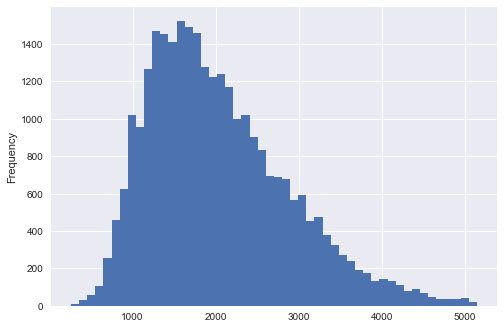

In [135]:
df['sqft_living'].plot(kind = 'hist', bins = 50)

In [136]:
print(df['sqft_lot'].sort_values(ascending = False))

329      218226
1997     218171
27403    217852
28172    217800
17782    217800
          ...  
1798        468
3070        435
12400       420
8788        412
16934       402
Name: sqft_lot, Length: 28959, dtype: int64


<AxesSubplot:ylabel='Frequency'>

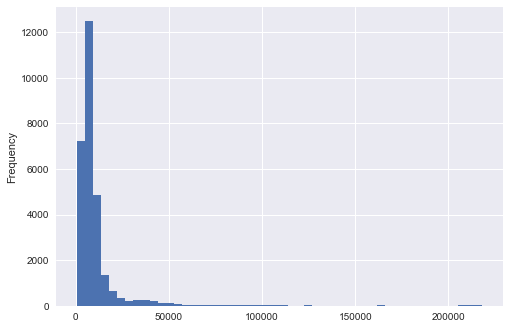

In [137]:
df['sqft_lot'].plot(kind = 'hist', bins = 50)

In [138]:
print(df['bedrooms'].sort_values(ascending = False))

9884     11
24101    10
11826     9
2536      9
2155      9
         ..
18639     0
17536     0
20643     0
1952      0
573       0
Name: bedrooms, Length: 28959, dtype: int64


<AxesSubplot:ylabel='Frequency'>

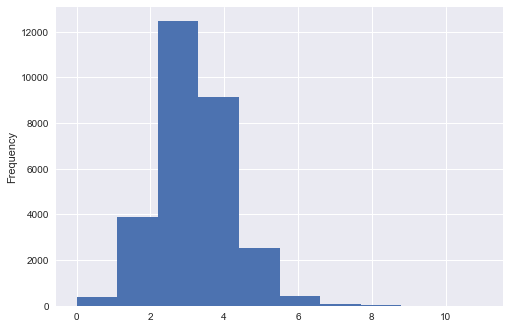

In [139]:
df['bedrooms'].plot(kind = 'hist', bins = 10)

In [140]:
print(df['bathrooms'].sort_values(ascending = False))

21623    7.5
657      7.5
1949     7.0
21296    7.0
24101    7.0
        ... 
25994    0.0
19920    0.0
28508    0.0
1289     0.0
7545     0.0
Name: bathrooms, Length: 28959, dtype: float64


<AxesSubplot:ylabel='Frequency'>

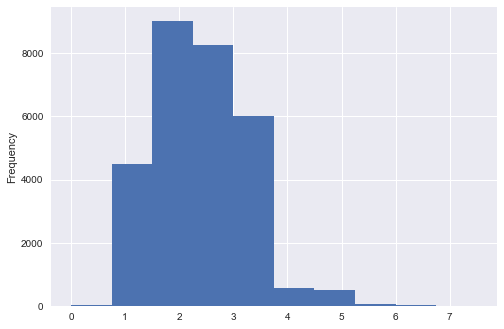

In [141]:
df['bathrooms'].plot(kind = 'hist', bins = 10)

In [142]:
print(df['condition'].sort_values(ascending = False))

21199    5
7311     5
7313     5
7314     5
7316     5
        ..
23335    1
7961     1
8468     1
11822    1
17155    1
Name: condition, Length: 28959, dtype: int64


<AxesSubplot:ylabel='Frequency'>

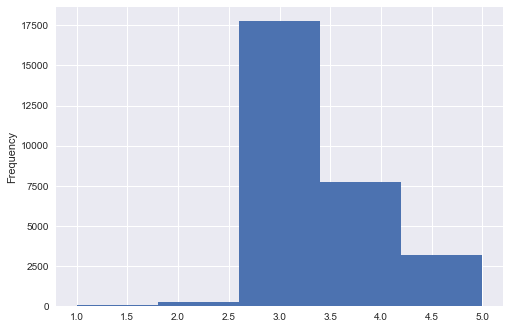

In [143]:
df['condition'].plot(kind = 'hist', bins = 5)

In [144]:
print(df['grade'].sort_values(ascending = False))

21009    12
25829    12
14339    12
4890     12
11249    12
         ..
14636     3
29732     3
8468      3
21804     3
30071     2
Name: grade, Length: 28959, dtype: int64


<AxesSubplot:ylabel='Frequency'>

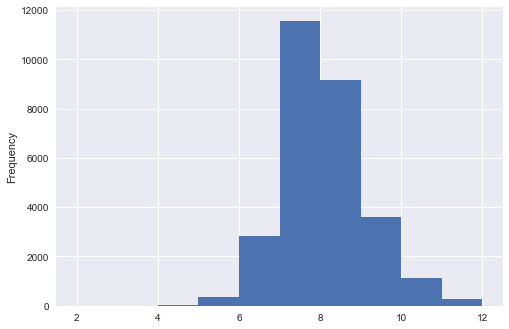

In [145]:
df['grade'].plot(kind = 'hist', bins = 10)

In [146]:
print(df['sqft_basement'].sort_values(ascending = False))

5984     2010
28487    2010
25748    2010
16320    2010
10786    2010
         ... 
16994       0
16998       0
17001       0
17005       0
0           0
Name: sqft_basement, Length: 28959, dtype: int64


<AxesSubplot:ylabel='Frequency'>

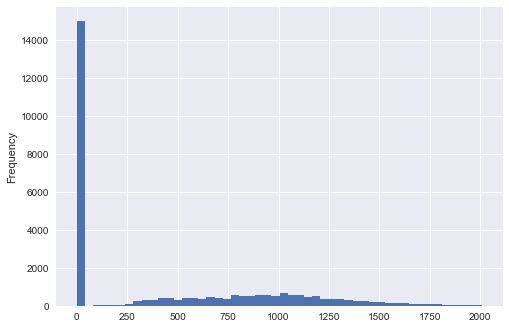

In [147]:
df['sqft_basement'].plot(kind = 'hist', bins = 50)

In [148]:
print(df['sqft_patio'].sort_values(ascending = False))

27705    1070
29993    1070
28847    1070
2416     1070
1997     1070
         ... 
15935       0
15932       0
15931       0
5156        0
30154       0
Name: sqft_patio, Length: 28959, dtype: int64


<AxesSubplot:ylabel='Frequency'>

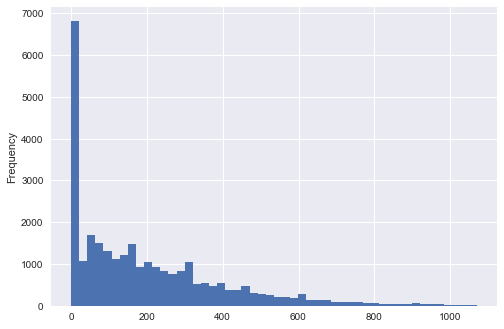

In [149]:
df['sqft_patio'].plot(kind = 'hist', bins = 50)

In [150]:
print(df['sqft_garage'].sort_values(ascending = False))

24076    1060
17435    1060
16836    1060
21272    1060
5076     1060
         ... 
9895        0
22463       0
22468       0
9886        0
0           0
Name: sqft_garage, Length: 28959, dtype: int64


<AxesSubplot:ylabel='Frequency'>

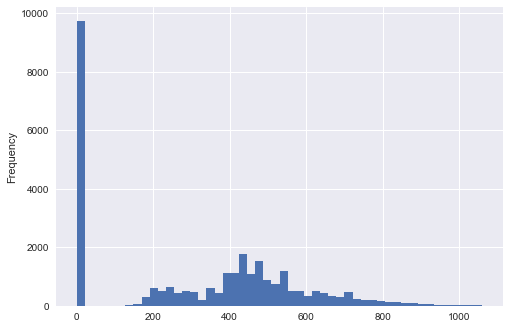

In [151]:
df['sqft_garage'].plot(kind = 'hist', bins = 50)

## Model Exploration

In [152]:
df = df[df['age'] > 49]
df = df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'condition', 'grade', 'sqft_basement', 'sqft_garage', 'sqft_patio', 'age']]
df.head()

,price,bedrooms,bathrooms,sqft_living,condition,grade,sqft_basement,sqft_garage,sqft_patio,age
0,675000.0,4,1.0,1180,4,7,0,0,40,52
1,920000.0,5,2.5,2770,3,7,1570,0,240,71
2,311000.0,6,2.0,2880,3,7,1580,0,0,65
5,625000.0,2,1.0,1190,3,7,0,300,0,73
6,1317227.0,3,3.0,2080,4,9,0,0,150,70


In [153]:
df['bathbed'] = df['bathrooms'] / df['bedrooms']
median_bathbed = df['bathbed'].median()
df.replace([np.inf, -np.inf], median_bathbed, inplace=True)
df.fillna(median_bathbed, inplace=True)

In [154]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,condition,grade,sqft_basement,sqft_garage,sqft_patio,age,bathbed
price,1.000000,0.235563,0.423621,0.506742,0.074478,0.523750,0.285369,0.083475,0.226416,0.086305,0.255102
bedrooms,0.235563,1.000000,0.583681,0.645940,0.104795,0.398960,0.350960,0.177073,0.183566,-0.116354,-0.216724
bathrooms,0.423621,0.583681,1.000000,0.761275,0.186211,0.557462,0.423196,0.240046,0.303988,-0.072543,0.606389
sqft_living,0.506742,0.645940,0.761275,1.000000,0.113242,0.666269,0.568536,0.200828,0.358703,-0.041236,0.286278
condition,0.074478,0.104795,0.186211,0.113242,1.000000,0.070840,-0.010871,0.053188,0.089552,-0.053190,0.103458
grade,0.523750,0.398960,0.557462,0.666269,0.070840,1.000000,0.373277,0.289103,0.270589,-0.096636,0.249887
sqft_basement,0.285369,0.350960,0.423196,0.568536,-0.010871,0.373277,1.000000,0.102250,0.211292,0.122797,0.178914
sqft_garage,0.083475,0.177073,0.240046,0.200828,0.053188,0.289103,0.102250,1.000000,0.110444,-0.481876,0.096146
sqft_patio,0.226416,0.183566,0.303988,0.358703,0.089552,0.270589,0.211292,0.110444,1.000000,-0.050352,0.182712
age,0.086305,-0.116354,-0.072543,-0.041236,-0.053190,-0.096636,0.122797,-0.481876,-0.050352,1.000000,0.042980


<AxesSubplot:>

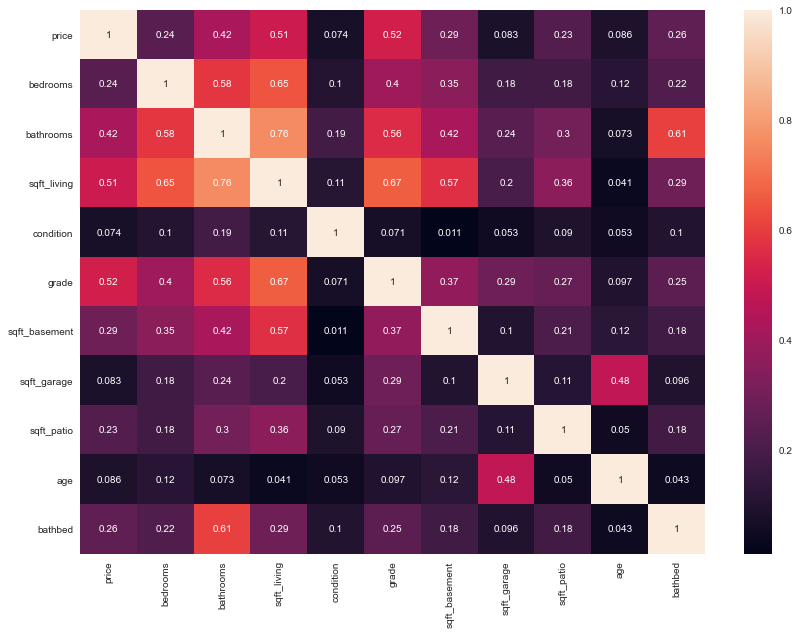

In [155]:
fig, ax = plt.subplots(figsize=(14,10))

sns.heatmap(df.corr().abs(), annot=True)

In [156]:
formula = "price ~ sqft_living"
all_mod = ols(formula=formula, data=df).fit()
all_mod_summ = all_mod.summary()
all_mod_summ

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.257
Model:                            OLS   Adj. R-squared:                  0.257
Method:                 Least Squares   F-statistic:                     4556.
Date:                Wed, 14 Sep 2022   Prob (F-statistic):               0.00
Time:                        10:15:24   Log-Likelihood:            -1.9400e+05
No. Observations:               13188   AIC:                         3.880e+05
Df Residuals:                   13186   BIC:                         3.880e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.314e+05   1.35e+04      9.705      0.000    1.05e+05    1.58e+05
sqft_living   481.6708      7.136     67.497      0.000     467.683     495.659
==============================================================================
Omnibus:                    15978.864   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5302102.609
Skew:                           6.155   Prob(JB):                         0.00
Kurtosis:                     100.455   Cond. No.                     4.98e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.98e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [157]:
formula = "price ~ bedrooms + bathrooms + sqft_basement + sqft_living + condition + sqft_garage + sqft_patio + age"
all_mod = ols(formula=formula, data=df).fit()
all_mod_summ = all_mod.summary()
all_mod_summ

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     674.6
Date:                Wed, 14 Sep 2022   Prob (F-statistic):               0.00
Time:                        10:15:24   Log-Likelihood:            -1.9370e+05
No. Observations:               13188   AIC:                         3.874e+05
Df Residuals:                   13179   BIC:                         3.875e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -1.11e+05   3.84e+04     -2.892      0.004   -1.86e+05   -3.58e+04
bedrooms      -1.083e+05   6722.543    -16.112      0.000   -1.21e+05   -9.51e+04
bathrooms      1.071e+05   1.02e+04     10.475      0.000    8.71e+04    1.27e+05
sqft_basement   -38.3828     11.303     -3.396      0.001     -60.538     -16.227
sqft_living     489.8629     12.961     37.796      0.000     464.458     515.268
condition      9061.6060   6540.942      1.385      0.166   -3759.582    2.19e+04
sqft_garage     108.4487     26.733      4.057      0.000      56.049     160.848
sqft_patio      145.0090     27.880      5.201      0.000      90.360     199.658
age            4300.9766    304.994     14.102      0.000    3703.145    4898.808
==============================================================================
Omnibus:                    16332.822   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          6025961.841
Skew:                           6.380   Prob(JB):                         0.00
Kurtosis:                     106.940   Cond. No.                     1.56e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [158]:
formula = "price ~ sqft_living + grade + sqft_patio"
all_mod = ols(formula=formula, data=df).fit()
all_mod_summ = all_mod.summary()
all_mod_summ

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.320
Model:                            OLS   Adj. R-squared:                  0.320
Method:                 Least Squares   F-statistic:                     2072.
Date:                Wed, 14 Sep 2022   Prob (F-statistic):               0.00
Time:                        10:15:24   Log-Likelihood:            -1.9341e+05
No. Observations:               13188   AIC:                         3.868e+05
Df Residuals:                   13184   BIC:                         3.869e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1.317e+06    4.4e+04    -29.954      0.000    -1.4e+06   -1.23e+06
sqft_living   257.7519      9.448     27.281      0.000     239.233     276.271
grade        2.589e+05   7505.201     34.497      0.000    2.44e+05    2.74e+05
sqft_patio    138.0442     27.125      5.089      0.000      84.875     191.214
==============================================================================
Omnibus:                    16700.813   Durbin-Watson:                   1.917
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          6834047.504
Skew:                           6.623   Prob(JB):                         0.00
Kurtosis:                     113.731   Cond. No.                     1.72e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.72e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [159]:
dflog = df.copy()


In [160]:
# dflog['bathbed'] = dflog['bathrooms'] / dflog['bedrooms']
# median_bathbed = dflog['bathbed'].median()
# dflog.replace([np.inf, -np.inf], median_bathbed, inplace=True)
# dflog.fillna(median_bathbed, inplace=True)
# dflog['bathbed'].value_counts()

In [161]:
#list for cols to scale
cols_to_scale = ['sqft_living', 'sqft_basement', 'sqft_garage', 'sqft_patio', 'age']

#create and fit scaler
scaler = StandardScaler()
scaler.fit(dflog[cols_to_scale])

#scale selected data
dflog[cols_to_scale] = scaler.transform(dflog[cols_to_scale])
dflog


,price,bedrooms,bathrooms,sqft_living,condition,grade,sqft_basement,sqft_garage,sqft_patio,age,bathbed
0,675000.0,4,1.0,-0.794290,4,7,-1.045989,-0.795225,-0.633809,-1.228078,0.250000
1,920000.0,5,2.5,1.405668,3,7,1.783256,-0.795225,0.391853,-0.247719,0.500000
2,311000.0,6,2.0,1.557867,3,7,1.801276,-0.795225,-0.838941,-0.557306,0.333333
5,625000.0,2,1.0,-0.780454,3,7,-1.045989,0.553441,-0.838941,-0.144523,0.500000
6,1317227.0,3,3.0,0.450969,4,9,-1.045989,-0.795225,-0.069695,-0.299317,1.000000
...,...,...,...,...,...,...,...,...,...,...,...
30140,2650000.0,4,3.5,2.097479,4,9,0.864202,-0.795225,-0.633809,1.042227,0.875000
30143,725000.0,3,1.0,-0.102479,3,7,0.539830,0.283708,-0.838941,0.835836,0.333333
30146,380000.0,3,1.0,-1.237049,4,6,-1.045989,-0.795225,-0.838941,-0.092925,0.333333
30150,1555000.0,5,2.0,0.215754,4,8,0.990346,-0.795225,0.238004,1.248619,0.400000


## Good

In [162]:
target = dflog['price']
predictors = dflog.drop(['price', 'condition', 'bedrooms', 'bathrooms', 'has_patio'], axis=1)
predictors = sm.add_constant(predictors)
model = sm.OLS(target, predictors).fit()
model.summary()

KeyError: "['has_patio'] not found in axis"

In [ ]:
formula = "price ~ bathbed"
all_mod = ols(formula=formula, data=dflog).fit()
all_mod_summ = all_mod.summary()
all_mod_summ